#### 1. Packages Import and Environment Set Up

Environment Set Up:
- pip install sklearn
- pip install quandl
- pip install pandas

In [3]:
import pandas as pd 
import math 
import quandl
import numpy as np
#from sklearn import preprocessing, cross_validation, svm
from sklearn import preprocessing, svm
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import random

# (A) Regression Problem

#### a. Features and Labels

In [2]:
# Pattern Recognition
# Since it is a regression problem, remove variables with high correlation with each other

In [3]:
df = quandl.get("WIKI/GOOGL")

In [4]:
df = df[['Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume']]
df['HL_PCT'] = (df['Adj. High'] - df['Adj. Low']) / df['Adj. Close'] * 100.0
df['PCT_change'] = (df['Adj. Close'] - df['Adj. Open']) / df['Adj. Open'] * 100.0

In [5]:
df = df[['Adj. Close', 'HL_PCT', 'PCT_change', 'Adj. Volume']]
forecast_col = 'Adj. Close'
#missing data will be treated as outliers in the dataset 
df.fillna(value=-99999, inplace=True)
#math.ceil will round all no to nearest whole no
forecast_out = int(math.ceil(0.01 * len(df)))
#label price for each row will be the adjusted close price 10 days into the future 
df['label'] = df[forecast_col].shift(-forecast_out)

In [6]:
#drop null information from the dataframe
df.dropna(inplace=True)

In [7]:
print(df.tail(20))

            Adj. Close    HL_PCT  PCT_change  Adj. Volume    label
Date                                                              
2018-01-08     1114.21  0.822107    0.288929    1148958.0  1103.92
2018-01-09     1112.79  0.920210   -0.505168    1335995.0  1071.41
2018-01-10     1110.14  0.792693    0.283650    1027781.0  1084.14
2018-01-11     1111.88  0.752779   -0.038658    1102461.0  1094.76
2018-01-12     1130.65  2.059877    1.851185    1914460.0  1100.90
2018-01-16     1130.70  1.965154   -0.842753    1783881.0  1115.04
2018-01-17     1139.10  1.389694    0.241121    1353097.0  1129.38
2018-01-18     1135.97  1.419932   -0.296660    1333633.0  1160.84
2018-01-19     1143.50  0.986445    0.480655    1418376.0  1165.93
2018-01-22     1164.16  2.152625    1.778252    1437954.0  1139.91
2018-01-23     1176.17  0.957345    0.474108    1832126.0  1148.89
2018-01-24     1171.29  1.677637   -1.155294    1818182.0  1150.61
2018-01-25     1182.14  1.113235    0.121114    1398961.0  113

#### b. Training and Testing

In [8]:
#Define Label and Features 
x = np.array(df.drop(['label'],1))
y = np.array(df['label'])

# Scale x 
# To improve accuracy, you usually wish to ensure that you scale the data to bet -1 to +1 
X = preprocessing.scale(x)
y = np.array(df['label'])

# training set of features, testing set of features, training set of labels, and testing set of labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### How do we choose the right estimator? 
https://scikit-learn.org/stable/tutorial/machine_learning_map/

### Support Vector Regression 
#### https://medium.com/coinmonks/support-vector-regression-or-svr-8eb3acf6d0ff

In [9]:
# Chosen Classifier: Support Vector Regression from Scikit-Learn's svm package
# SVM Packages: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html
clf = svm.SVR()

# Fit in classifier with the features and labels
clf.fit(X_train, y_train)

# Test the classifer by finding the confidence
confidence = clf.score(X_test, y_test)
print(confidence)

/Users/user/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.7933639008003522


### Linear Regression

In [10]:
clf = LinearRegression()
clf = LinearRegression(n_jobs=-1)  #Choose all available threads

# Try out different combination of kernel to transform against the data (i.e. grossly simplify the data)
for k in ['linear','poly','rbf','sigmoid']:
    clf = svm.SVR(kernel=k)
    clf.fit(X_train, y_train)
    confidence = clf.score(X_test, y_test)
    print(k,confidence)

linear 0.9791277175477009


/Users/user/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


poly 0.6092432324657613


/Users/user/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


rbf 0.7933639008003522


/Users/user/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


sigmoid 0.8970236533024409


Possible for Threading: n_jobs, you have an algorithm that can be threaded for high performance
Impossible for Threading: lack of n_jobs

- if you are processing massive amounts of data, or you need to process medium data but at a very high rate of speed, then you would want something threaded. 

In [11]:
# Final Chosen Classifier
clf = LinearRegression(n_jobs=-1)
clf.fit(X_train, y_train)
confidence = clf.score(X_test, y_test)
print(confidence)

0.9796252122778136


#### c. Forecasting and Predicting

In [12]:
X = np.array(df.drop(['label'], 1))
X = preprocessing.scale(X)
# X_lately will only containt the most reent features which will be predicted against
X_lately = X[-forecast_out:]
X = X[:-forecast_out]

In [13]:
df.dropna(inplace=True)
y_working = df['label']
y_working_final = y_working.iloc[:3354]
y = np.array(y_working_final)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
clf = LinearRegression(n_jobs=-1)
clf.fit(X_train, y_train)
confidence = clf.score(X_test, y_test)
print(confidence)

0.9773518452371446


In [14]:
forecast_set = clf.predict(X_lately)

In [15]:
print(forecast_set, confidence, forecast_out)

[1082.86238174 1097.12005488 1110.68526132 1105.72248864 1099.34515796
 1097.20771349 1095.88325442 1091.95935961 1086.20861095 1081.67456861
 1079.90663786 1097.69210587 1116.38957074 1122.39087517 1136.9197478
 1141.31424615 1139.64328617 1137.24506893 1139.03911571 1156.13677779
 1156.21272976 1165.74856708 1162.49736742 1170.80998633 1190.18085021
 1203.98273755 1197.88533317 1209.90407741 1214.50374876 1214.18420863
 1204.91875975 1209.78649111 1208.44660959 1143.87189041 1087.59008817] 0.9773518452371446 35


In [16]:
# Visualizting the Forecast 
import datetime
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

# Add a new Forecast Column
df['Forecast'] = np.nan # set to NAN first then populate shortly 
last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += 86400
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]

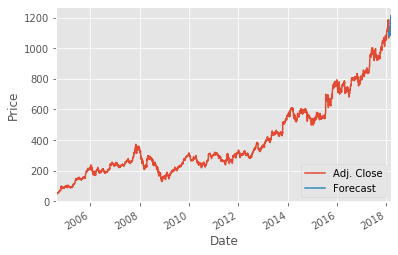

In [17]:
df['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

#### d. Pickling and Scaling 

### Importance of Pickling:
- While our machine learning classifier takes a few seconds to train, there may be cases where it takes hours or even days to train a classifier. Imagine needing to do that every day you wanted to forecast prices, or whatever. This is not necessary, as we can just save the classifier using the Pickle module.

In [18]:
import pickle

In [19]:
# you can save any python object (like classifier) with pickle, do pickling after defining, training and testing the classifier

with open('linearregression.pickle','wb') as f:
    pickle.dump(clf, f)

In [20]:
pickle_in = open('linearregression.pickle','rb')
clf = pickle.load(pickle_in)

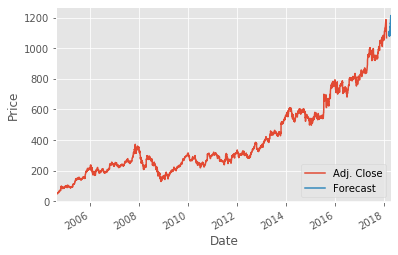

In [21]:
# Revamped Code if you consider the method of pickling 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
#COMMENTED OUT:
##clf = svm.SVR(kernel='linear')
##clf.fit(X_train, y_train)
##confidence = clf.score(X_test, y_test)
##print(confidence)
pickle_in = open('linearregression.pickle','rb')
clf = pickle.load(pickle_in)


forecast_set = clf.predict(X_lately)
df['Forecast'] = np.nan

last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += 86400
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]
df['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

#### e. Regression Line

##### (a) Lets calculate gradient m first

In [22]:
from IPython.display import Image
from IPython.core.display import HTML 

# Formula to Calculating m (gradient) for the best fit line
Image(url= "https://pythonprogramming.net/static/images/machine-learning/best-fit-slope.png", width=300, height=300)

In [23]:
from statistics import mean
import numpy as np

##### Order of Operation in Python: PEMDAS

- P --> Parentheses first
- E --> Exponents (ie Powers and Square Roots, etc.)
- MD --> Multiplication and Division (left-to-right)
- AS --> Addition and Subtraction (left-to-right)

In [24]:
# Using Numpy Arrays so that we can perform matrix operations later
xs = np.array([1,2,3,4,5], dtype=np.float64)
ys = np.array([5,4,6,5,6], dtype=np.float64)

def best_fit_slope(xs,ys):
    m = (((mean(xs)*mean(ys)) - mean(xs*ys)) /
         ((mean(xs)**2) - mean(xs**2)))
    return m

m = best_fit_slope(xs,ys)
print(m)

0.29999999999999893


In [25]:
def best_fit_slope_and_intercept(xs,ys):
    m = (((mean(xs)*mean(ys)) - mean(xs*ys)) /
         ((mean(xs)*mean(xs)) - mean(xs*xs)))
    
    b = mean(ys) - m*mean(xs)
    
    return m, b

m, b = best_fit_slope_and_intercept(xs,ys)

print(m,b)

0.29999999999999893 4.300000000000003


##### (b) Let's calculate intercept b next 

In [29]:
# Formula to Calculating m (gradient) for the best fit line
Image(url= "https://pythonprogramming.net/static/images/machine-learning/best-fit-y-intercept.png", width=300, height=300)

In [26]:
# Calculate the regression line 
# METHOD ONE
regression_line = [(m*x)+b for x in xs]

# METHOD TWO 
regression_line = []
for x in xs:
    regression_line.append((m*x)+b)

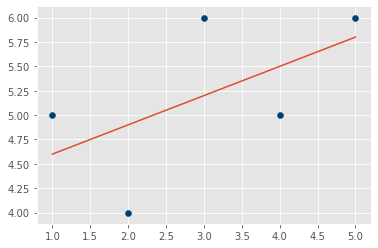

In [27]:
# PLOTTING THE BEST FIT LINE
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
plt.scatter(xs,ys,color='#003F72')
plt.plot(xs, regression_line)
plt.show()

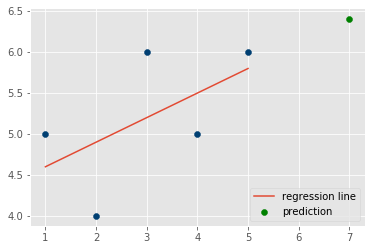

In [41]:
# Plotting the Best Fit Line together with Prediction Point
predict_x = 7
predict_y = (m*predict_x)+b

plt.scatter(predict_x, predict_y,color='g',label='prediction')
plt.scatter(xs,ys,color='#003F72')
plt.plot(xs, regression_line, label='regression line')
plt.legend(loc=4)
plt.show()

#### f. Regression - R Squared and Coefficient of Determination Theory

#### (a) Sqaured Errors

- The standard way to check for errors is by using squared errors aka r squared or the coefficient of determination
- Definition: The distance between the regression line's y values, and the data's y values is the error, then we square that. The line's squared error is either a mean or a sum of this, we'll simply sum it.

In [43]:
# Illustration for r squared errors
Image(url= "https://pythonprogramming.net/static/images/machine-learning/squared-error-visual.png", width=300, height=300)

- Note that for best fit line approach, we are actually assuming it fulfill the idea for least squared errors
- Our best-fit line equation is the result of a proof that is used to discover the calculation for the best-fit regression line, where the regression line is the line that has the least squared error. 

###### Rationale for using Best Fit Line Approach 
- First, we want a way to normalize the error as a distance, so the error might be -5, but, when squared, that's a positive number. Another reason is to further punish for outliers. 

#### (b) Coefficient of Determination Theory or R Squared

In [44]:
Image(url= "https://pythonprogramming.net/static/images/machine-learning/coefficient-of-determination-r-squared.png", width=300, height=300)

The equation is essentially 1 minus the division of the squared error of the regression line and the squared error of the mean y line. The mean y line is quite literally the mean of all of the y values from the dataset. If you were to graph it, then it would be a flat, horizontal, line. Thus, we do the squared error of the average y, and of the regression line. The objective here is to discern how much of the error is actually just simply a result in variation in the data features, as opposed to being a result of the regression line being a poor fit.
- The higher the R value, the better the regression line

In [45]:
def squared_error(ys_orig,ys_line):
    return sum((ys_line - ys_orig) * (ys_line - ys_orig))

In [46]:
def coefficient_of_determination(ys_orig,ys_line):
    y_mean_line = [mean(ys_orig) for y in ys_orig]
    squared_error_regr = squared_error(ys_orig, ys_line)
    squared_error_y_mean = squared_error(ys_orig, y_mean_line)
    return 1 - (squared_error_regr/squared_error_y_mean)

In [47]:
r_squared = coefficient_of_determination(ys,regression_line)
print(r_squared)

0.3214285714285714


In most cases, if you care about predicting exact future values, r squared is indeed very useful. If you're interested in predicting motion/direction, then our best fit line is actually pretty good so far, and r squared shouldn't carry as much weight. 

**Analysis:**
- The coefficient of determination value is low as the variation in y was very large

#### g. Regression - Creating Sample Data for Testing

**Parameter Definition**

**hm** - The value will be "how much." This is how many datapoints that we want in the set. We could choose to have 10, or 10 million, for example.

**variance** - This will dictate how much each point can vary from the previous point. The more variance, the less-tight the data will be.

**step** - This will be how far to step on average per point, defaulting to 2.

**correlation** - This will be either False, pos, or neg to indicate that we want no correlation, positive correlation, or negative correlation.

In [1]:

def create_dataset(hm, variance, step=2, correlation=False):
    val = 1
    ys = []
    for i in range(hm):
        y = val + random.randrange(-variance,variance)
        ys.append(y)
        if correlation and correlation == 'pos':
            val+=step
        elif correlation and correlation == 'neg':
            val-=step
            
    xs = [i for i in range(len(ys))]
    
    return np.array(xs, dtype=np.float64),np.array(ys, dtype=np.float64)

In [4]:
xs, ys = create_dataset(40,40,2,correlation='pos')

In [5]:
xs,ys

(array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
        26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
        39.]),
 array([  6., -16.,  11.,  42., -22.,  -7.,  -4.,  52.,  19.,  -9.,  15.,
         29.,  30.,  33.,  68.,  63.,  37.,  50.,  56.,  58.,  12.,  78.,
         77.,  71.,  35.,  52.,  28.,  68.,  18.,  88.,  38.,  63., 100.,
         27.,  61.,  43.,  79.,  48.,  58.,  63.]))

### Combined Code till now 

1343.100750469043
1347.1
0.002968784448783901


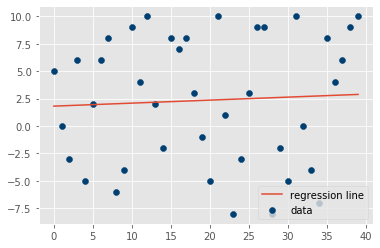

In [11]:
from statistics import mean
import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')


def create_dataset(hm,variance,step=2,correlation=False):
    val = 1
    ys = []
    for i in range(hm):
        y = val + random.randrange(-variance,variance)
        ys.append(y)
        if correlation and correlation == 'pos':
            val+=step
        elif correlation and correlation == 'neg':
            val-=step

    xs = [i for i in range(len(ys))]
    
    return np.array(xs, dtype=np.float64),np.array(ys,dtype=np.float64)

def best_fit_slope_and_intercept(xs,ys):
    m = (((mean(xs)*mean(ys)) - mean(xs*ys)) /
         ((mean(xs)*mean(xs)) - mean(xs*xs)))
    
    b = mean(ys) - m*mean(xs)

    return m, b


def coefficient_of_determination(ys_orig,ys_line):
    y_mean_line = [mean(ys_orig) for y in ys_orig]

    squared_error_regr = sum((ys_line - ys_orig) * (ys_line - ys_orig))
    squared_error_y_mean = sum((y_mean_line - ys_orig) * (y_mean_line - ys_orig))

    print(squared_error_regr)
    print(squared_error_y_mean)

    r_squared = 1 - (squared_error_regr/squared_error_y_mean)

    return r_squared


xs, ys = create_dataset(40,10,2,correlation=False)
m, b = best_fit_slope_and_intercept(xs,ys)
regression_line = [(m*x)+b for x in xs]
r_squared = coefficient_of_determination(ys,regression_line)
print(r_squared)

plt.scatter(xs,ys,color='#003F72', label = 'data')
plt.plot(xs, regression_line, label = 'regression line')
plt.legend(loc=4)
plt.show()

In [12]:
# Test the above chunk of code by making the following changes
xs, ys = create_dataset(40,10,2,correlation='pos')
xs, ys = create_dataset(40,10,2,correlation='neg')
xs, ys = create_dataset(40,10,2,correlation=False)

#### Conclusion from the above analysis
- Less variance should result in higher r-squared/coefficient of determination, higher variance = lower r squared. What about no correlation? This should be even lower, and actually quite close to zero, unless we get a crazy random permutation that actually has correlation anyway


# (B) Classification Problem

#### Two Major Classification Algorithms: K Nearest Neighbours and Support Vector Machine 
- Supervised Learning
- Have prior-labeled data for training

**(a) K Nearest Neighbors**
- Simple and effective machine learning classification algorithm
- K refers to the number you can choose
- Neighbors are data points from known data 
- Due to the nature of the vote, likely that you want an odd number for K, otherwiese will be 50/50 split situation
- if you wanna have even no for K, then apply wieghts to the distance to penalize for greater distances

##### Scikit-learn Algorithm for K Nearest Neighbors for Breast Cancer Data

In [2]:
# Inepsect Missing and Bad Data
import numpy as np
from sklearn.model_selection import cross_validate
from sklearn import preprocessing, neighbors
import pandas as pd
import os

In [3]:
# check current directory 
os.getcwd() 

'/Users/user/Desktop/Self_Learn'

In [5]:
df = pd.read_csv('breast-cancer-wisconsin.data')
# Fill in missing values with extreme data
df.replace('?',-99999, inplace=True)
# Drop id column as it is not very effective for classifying (i.e. meaningless)
df.drop(['id_no'], 1, inplace=True)

In [6]:
df

,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,single_epi_cell_size,bare_nuclei,bland_chromation,normal_nucleoli,mitoses,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2,1,1,1,2
695,2,1,1,1,2,1,1,1,1,2
696,5,10,10,3,7,3,8,10,2,4
697,4,8,6,4,3,4,10,6,1,4
